## Where does it pay to go to college?

For my capstone project, I will be analyzing data on starting and mid-career salaries for students that have gone to different types of colleges:  Engineering, Ivy League, Liberal Arts, Party, and State. 

In [12]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
# Loading files
degrees = pd.read_csv('capstone-data/degrees-that-pay-back.csv')
college = pd.read_csv('capstone-data/salaries-by-college-type.csv')
region = pd.read_csv('capstone-data/salaries-by-region.csv')

### Describe the dataset

In [3]:
# Summary statistics of college dataset
college.describe()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,269,269,269,269,231,269,269,231
unique,249,5,145,168,141,178,110,98
top,University of Florida (UF),State,"$42,600.00","$72,100.00","$40,100.00","$54,100.00","$106,000.00","$150,000.00"
freq,2,175,7,5,6,6,11,8


In [4]:
# Renaming columns
college.columns = ['name', 'type','start_med', 'mid_med', 'mid_p10', 'mid_p25', 'mid_p75', 'mid_p90']
college.head()

,name,type,start_med,mid_med,mid_p10,mid_p25,mid_p75,mid_p90
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [5]:
#Changing strings to ints for analysis

dollar_cols = ['start_med', 'mid_med', 'mid_p10', 'mid_p25', 'mid_p75', 'mid_p90']

for x in dollar_cols:
    college[x] = college[x].str.replace("$","")
    college[x] = college[x].str.replace(",","")
    college[x] = pd.to_numeric(college[x])

college.head()

,name,type,start_med,mid_med,mid_p10,mid_p25,mid_p75,mid_p90
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


In [6]:
# Summary statistics by type of school
college.groupby('type').describe()

mid_med                                                   \
               count           mean           std       min       25%   
type                                                                    
Engineering     19.0  103842.105263  13840.733594   80000.0   94400.0   
Ivy League       8.0  120125.000000  10412.046594  107000.0  109750.0   
Liberal Arts    47.0   89378.723404  12318.172086   63900.0   80850.0   
Party           20.0   84685.000000   7237.568289   73000.0   79350.0   
State          175.0   78567.428571  10296.072330   43900.0   71800.0   

                                           mid_p10                 ...     \
                   50%       75%       max   count          mean   ...      
type                                                               ...      
Engineering   106000.0  114000.0  126000.0    15.0  61793.333333   ...      
Ivy League    122000.0  127250.0  134000.0     8.0  57900.000000   ...      
Liberal Arts   85800.0  101500.0  110000.0    14.0  47478.571429   ...      
Party          84050.0   88975.0   96100.0    19.0  44052.631579   ...      
State          78500.0   84450.0  112000.0   175.0  41886.285714   ...      

               mid_p90           start_med                             \
                   75%       max     count          mean          std   
type                                                                    
Engineering   187500.0  220000.0      19.0  59057.894737  7842.924326   
Ivy League    296250.0  326000.0       8.0  60475.000000  3218.584427   
Liberal Arts  214000.0  265000.0      47.0  45746.808511  4368.854743   
Party         175000.0  209000.0      20.0  45715.000000  3685.715670   
State         161500.0  215000.0     175.0  44126.285714  4269.067495   

                                                           
                  min      25%      50%      75%      max  
type                                                       
Engineering   46200.0  53250.0  58300.0  62000.0  75500.0  
Ivy League    56200.0  58825.0  59850.0  61525.0  66500.0  
Liberal Arts  38500.0  42250.0  45500.0  48600.0  54500.0  
Party         41300.0  42500.0  44600.0  47975.0  52900.0  
State         34800.0  41400.0  43600.0  46300.0  59900.0  

[5 rows x 48 columns]

The summary statistics show that we have data on a lot more state schools (175) compared to the other types of schools.  We also see that Ivy League and Engineering schools have higher mean starting and mid-career salaries compared to the other types.  We would need to run statistical tests to determine if these differences are significant.

### Analysis

#### What is the distribution of starting and mid-career salaries look like for the different types of colleges?

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


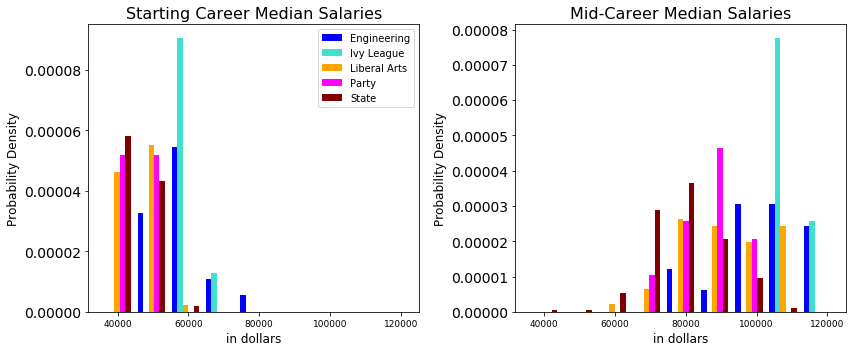

In [7]:
# Creating variables for relevant data arrays
Eng = college[college['type'] == "Engineering"]['start_med']
Ivy = college[college['type'] == "Ivy League"]['start_med']
LibArts = college[college['type'] == "Liberal Arts"]['start_med']
Party = college[college['type'] == "Party"]['start_med']
State = college[college['type'] == "State"]['start_med']
start_med = [Eng, Ivy, LibArts, Party, State]

Eng2 = college[college['type'] == "Engineering"]['mid_med']
Ivy2 = college[college['type'] == "Ivy League"]['mid_med']
LibArts2 = college[college['type'] == "Liberal Arts"]['mid_med']
Party2 = college[college['type'] == "Party"]['mid_med']
State2 = college[college['type'] == "State"]['mid_med']
mid_career = [Eng2, Ivy2, LibArts2, Party2, State2]

# Generating histograms for starting and mid-career salaries by type of school
plt.figure(figsize=(12,5))

n_bins = 9
colors = ['blue','turquoise', 'orange', 'magenta','maroon']
labels = ['Engineering','Ivy League','Liberal Arts','Party','State']
xrange = (35000, 122000) 

plt.subplot(1, 2, 1)
start_med_hist = plt.hist(start_med, n_bins, xrange, histtype='bar', normed=True, color=colors, label=labels)
plt.title('Starting Career Median Salaries', fontsize=16)
plt.xlabel("in dollars", fontsize=12)  
plt.ylabel("Probability Density", fontsize=12)
plt.xticks(fontsize=9)  
plt.yticks(fontsize=14)
plt.legend(prop={'size':10})

plt.subplot(1, 2, 2)
mid_career_hist = plt.hist(mid_career, n_bins, xrange, histtype='bar', normed=True, color = colors, label=labels)
plt.title('Mid-Career Median Salaries', fontsize=16)
plt.xlabel("in dollars", fontsize=12)  
plt.ylabel("Probability Density", fontsize=12)
plt.xticks(fontsize=9)  
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()



/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


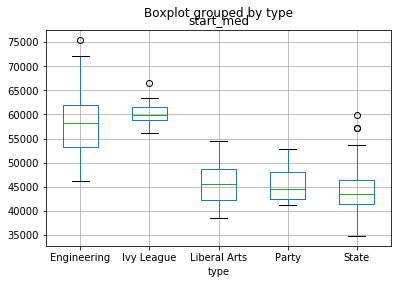

In [8]:
# Boxplots of starting median salaries by type of college.

college.boxplot('start_med',by='type')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


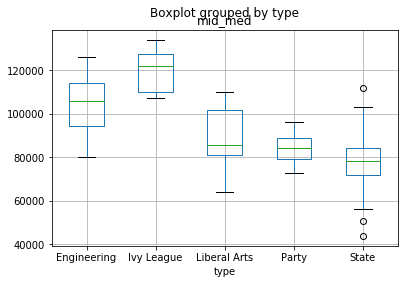

In [9]:
#Boxplots of mid-career salaries by type of college

college.boxplot('mid_med',by='type')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


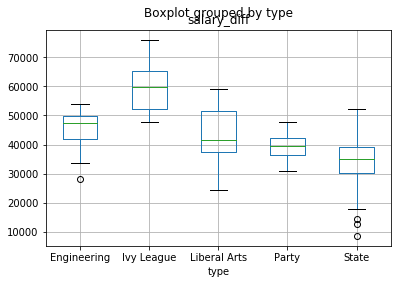

In [10]:
#Boxplot of the difference between starting median salaries and mid-career salaries for each college type

college['salary_diff'] = college['mid_med'] - college['start_med']

college.boxplot('salary_diff', by='type')

Engineering schools have the most range with starting median salaries, implying that where an engineering student goes to school matters more than the other types of colleges.  Ivy leagues have less variation in terms of starting salaries and the highest mean starting median salary. Where you go within the Ivy League system matters less when looking at starting median salaries. Liberal Arts, Party and State schools have similar mean median starting salaries, with more variation in state schools.  State schools also has the largest count compared to the other schools, as seen in the histogram. This may account for the variation.

The mid-career boxplots actually look pretty similar to the starting median salaries boxplots.  It is interesting to note that Ivy League mid-career salaries has pulled ahead of Engineering mid-career salaries, such that all 8 mid-career salaries from Ivy League schools are higher than 50% of Engineering mid-career salaries.  

The last boxpot examines the difference between mid-career salaries and starting salaries for each school type.  Not surprisingly, Ivy Leagues come on top again, with the highest mean difference in salaries.  Party schools have the second lowest mean and the least variation, suggesting that graduates from party schools experience limited growth in salaries.  



#### Significance testing

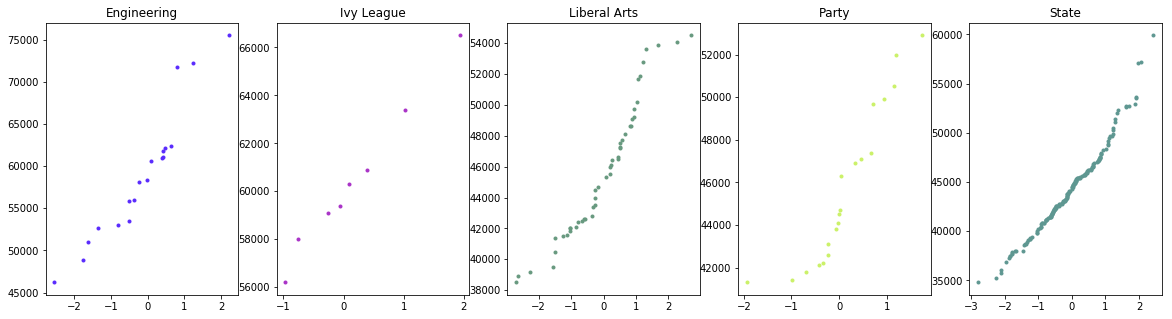

In [33]:
#To run the ANOVA test, we want to check for normality in the data.  We do this by generating QQ plots.

plt.figure(figsize=(20,5))
types = ['Engineering','Ivy League','Liberal Arts','Party','State']

for i in range(0,len(types)):  
    plt.subplot(1, 5, i+1)
        
    t = types[i]
        
    x = college[college['type'] == t]['start_med'].sort_values()

    norm = np.random.normal(0,1,len(x))
    norm.sort()

    plt.plot(norm, x, ".", c=np.random.rand(3))
    plt.title(t)
        
    i = i + 1 

Given the relatively small n's for each type, especially for Ivy Leagues, we can say that the data is normal for the purposes of this analysis.

In [26]:
# Setting up for running ANOVA tests

grps = ['Engineering','Ivy League','Liberal Arts', 'Party', 'State']
sm_data = {grp:college['start_med'][college.type == grp] for grp in grps}
mc_data = {grp:college['mid_med'][college.type == grp] for grp in grps}
k = len(pd.unique(college.type))
N = len(college.values)
n = college.groupby('type').size()[0]

In [27]:
# Let's start by comparing the starting median salaries of Liberal Arts, Party, and State schools.
f, p = stats.f_oneway(sm_data['Liberal Arts'], sm_data['Party'], sm_data['State'])

f, p

(3.4891625730952733, 0.032090521289493482)

The F-Statistic of 3.5 and a p-value of 0.03 indicates that, if the the starting median salaries of these three schools are the same, we would expect to obtain the observed difference or more in 3% of the studies due to sampling error.  This suggests we can reject the null hypothesis and assume that these three types of schools have significantly different starting median salaries.

In [29]:
# Looking at mid-career salaries between Liberal Arts, Party and State
f, p = stats.f_oneway(mc_data['Liberal Arts'], mc_data['Party'], mc_data['State'])

f, p

(20.803121035382407, 4.6872542148297379e-09)

The F-Statistic of 20.8 and a p-value of 4.7e-09 indicates we can reject the null hypothesis and assume that these three types of schools have significantly different mid-career median salaries.

In [30]:
# Now let's compare the starting median salaries and mid-career salaries for engineering and Ivy League schools.
f, p = stats.f_oneway(sm_data['Engineering'], sm_data['Ivy League'])

f, p

(0.23957672727197019, 0.62877930261234283)

In [31]:
f, p = stats.f_oneway(mc_data['Engineering'], mc_data['Ivy League'])

f, p

(8.8696038170912281, 0.0063626584007039971)

Interestingly, the difference in salaries of Engineering and Ivy League schools start off as not significantly different (p-value = 0.63), but become significant when we look at mid-career salaries (p-value = 0.006).  This suggests that, in the long run, it still pays to go to an Ivy League school.  

### Conclusions


### Further Research

The current analysis does not consider the cost of tuition and student loans.  Ivy leagues, for example, have higher sticker prices than a state school might.  How long does it take a student of each type school to earn back the cost of tuition?  If we consider the median student loan amounts, how would the conclusions change?  Analysis into tuition and student loans would require gathering more data through APIs and/or web-scraping.

It would also be interesting to consider the majors.  Is a Party school engineering student doing better than an Ivy League Art History major?  We could apply linear regression models to determine what factors result in the highest starting and mid-career salaries.  

